In [1]:
# The dataset provided belongs to a popular entertaintment streaming service in the world 
# Since there is no data related to revenue We begin with the assumption that it has a profitable revenue
# The problem statemnt that we aim to answer below will be insightfull and to see what can be done better
#   In terms of content,what is popular among the audience? Movies or Series?
#   What is the global reach of this paltform?
#   In which country is the most content released?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset using pandas library for EDA
nf = pd.read_csv('C:/Scaler-Modules/Netflix/Netflix.csv')  

In [4]:
#check the initial data to see the preview of how the data looks
#the imported data gives the 2d list in the form of table which is called 'dataframe'
#Each and every column is called 'series'
nf.head(5) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#we identify and explore the different variables and datatypes available in the dataset 
#This gives the information about overall count of non null data,datatypes of the each column
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
#Returns the dimension of the data in the form of tuple
#we see that there are 8807 rows and 12 columns from the dataset provided
nf.shape

(8807, 12)

In [7]:
# keys return the columns in the form of explicit indexes and each key has values associated with it 
# which are the rows for each column
nf.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [30]:
# Now we can analyse the basic metrics of the given data
# This gives the statistical summary of the data for int and floating values
nf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
# This will return summary of stastistical table for all the columns including object columns 
nf.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [8]:
#Includes only numerical columns for aggregration
nf.describe(include=[np.number])

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
#This will return transposed summary of the data where columns are now the index and rows represent measure of each object column
# include='object' parameter ensure that only object columns are included
# we see that out of 8807 rows, movies account t0 6131
nf.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [10]:
# analysing null values
# isnull() or isna() both provide same funtionality where it returns the missing or null values 
# and can be used interchangeably with each other. here sum() will count all the true values which are the missing values
nf.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [35]:
# this will return the number of missing values in percentage.
# we see 29.9% of values missing in director column and 9% in cast and country columns
(nf.isna().sum()/nf.shape[0]) *100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [36]:
# The data conatains movies which were released from 1942 to 2021 
nf.release_year.nunique(),nf.release_year.unique()

(74,
 array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
        1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
        2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
        1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
        1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
        1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
        1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64))

In [11]:
# We have to preprocess the data before we can analyse using visual plots
# From the data we can see that director,cast and listed_in columns has multiple values 
#This will transform the cast column where in each value is unique 

constraint = nf['cast'].apply(lambda x: str(x).split(', ')).tolist()
nf_new = pd.DataFrame(constraint,index =nf['title'])
nf_new= nf_new.stack()
nf_new = pd.DataFrame(nf_new)
nf_new.reset_index(inplace=True)
nf_new = nf_new[['title',0]]
nf_new.columns =['title','cast']
nf_new

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [12]:
#This will transform the director column where in each value is unique 

constraint1 = nf['director'].apply(lambda x: str(x).split(', ')).tolist()
nf_d = pd.DataFrame(constraint1,index=nf['title'])
nf_d= nf_d.stack()
nf_d = pd.DataFrame(nf_d)
nf_d.reset_index(inplace=True)
nf_d = nf_d[['title',0]]
nf_d.columns =['title','director']
nf_d

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [13]:
#This will transform the country column where in each value is unique 

constraint2 = nf['country'].apply(lambda x: str(x).split(', ')).tolist()
nf_c = pd.DataFrame(constraint2,index=nf['title'])
nf_c= nf_c.stack()
nf_c = pd.DataFrame(nf_c)
nf_c.reset_index(inplace=True)
nf_c = nf_c[['title',0]]
nf_c.columns =['title','country']
nf_c

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [14]:
#This will transform the listed_in column where in each value is unique 

constraint3 = nf['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
nf_l = pd.DataFrame(constraint3,index=nf['title'])
nf_l= nf_l.stack()
nf_l = pd.DataFrame(nf_l)
nf_l.reset_index(inplace=True)
nf_l = nf_l[['title',0]]
nf_l.columns =['title','listed_in']
nf_l

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [15]:
#we have to merge all the four dataframe to create new frmae which will be used to merge to merge with original dataset
nf_merge1 = nf_new.merge(nf_d)
nf_merge2 = nf_c.merge(nf_l)
nf_merge = nf_merge1.merge(nf_merge2) 
nf_merge

,title,cast,director,country,listed_in
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [16]:
# merge with original dataset to have unique rows all through the dataset 
nf_final = pd.merge(nf,nf_merge,on=['title'],how='inner')
nf_final

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,description,cast_y,director_y,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
201987,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [18]:
# we need to remove the old columns and rename the new columns with names from original dataset
nf_f= nf_final.drop(columns=['director_x','cast_x','country_x','listed_in_x'])
nf_f=nf_f.rename(columns={'cast_y':'cast','director_y':'director','country_y':'country','listed_in_y':'listed_in'})
ordered= ['show_id','type','title', 'director', 'cast', 'country', 'date_added', 'release_year','rating','duration','listed_in','description']
nf_f=nf_f[ordered]
nf_f

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [22]:
nf_f.shape

(201991, 12)

In [19]:
nf_f.loc[nf_f.duplicated()]
nf_f

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [20]:
nf_f.loc[nf_f.duplicated(subset=['show_id','type','title', 'director', 'cast', 'country', 'date_added', 'release_year','rating','duration','listed_in','description'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
39336,s1632,Movie,Rust Creek,Jen McGowan,Micah Hauptman,United States,"November 30, 2020",2018,R,108 min,Thrillers,A wrong turn in the woods becomes a fight for ...
88474,s3719,Movie,Blood Will Tell,Miguel Cohan,Oscar Martínez,Argentina,"June 21, 2019",2019,TV-MA,113 min,Dramas,Family patriarch Elías begins to unravel after...
88475,s3719,Movie,Blood Will Tell,Miguel Cohan,Oscar Martínez,Argentina,"June 21, 2019",2019,TV-MA,113 min,Independent Movies,Family patriarch Elías begins to unravel after...
88476,s3719,Movie,Blood Will Tell,Miguel Cohan,Oscar Martínez,Argentina,"June 21, 2019",2019,TV-MA,113 min,International Movies,Family patriarch Elías begins to unravel after...
88477,s3719,Movie,Blood Will Tell,Miguel Cohan,Oscar Martínez,United States,"June 21, 2019",2019,TV-MA,113 min,Dramas,Family patriarch Elías begins to unravel after...
88478,s3719,Movie,Blood Will Tell,Miguel Cohan,Oscar Martínez,United States,"June 21, 2019",2019,TV-MA,113 min,Independent Movies,Family patriarch Elías begins to unravel after...
88479,s3719,Movie,Blood Will Tell,Miguel Cohan,Oscar Martínez,United States,"June 21, 2019",2019,TV-MA,113 min,International Movies,Family patriarch Elías begins to unravel after...
88486,s3719,Movie,Blood Will Tell,Miguel Cohan,Dolores Fonzi,Argentina,"June 21, 2019",2019,TV-MA,113 min,Dramas,Family patriarch Elías begins to unravel after...
88487,s3719,Movie,Blood Will Tell,Miguel Cohan,Dolores Fonzi,Argentina,"June 21, 2019",2019,TV-MA,113 min,Independent Movies,Family patriarch Elías begins to unravel after...
88488,s3719,Movie,Blood Will Tell,Miguel Cohan,Dolores Fonzi,Argentina,"June 21, 2019",2019,TV-MA,113 min,International Movies,Family patriarch Elías begins to unravel after...


In [21]:
#we delete the duplicates based on the combination of all the columns combined
nf_du=nf_f.drop_duplicates(subset=['show_id','type','title', 'director', 'cast', 'country', 'date_added', 'release_year','rating','duration','listed_in','description'],keep='first')
nf_du

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [22]:
#reset the index and setting the drop=true will remove the previous index column
nf_du.reset_index(drop=True,inplace =True)
nf_du

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,nan,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,nan,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201931,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
201932,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
201933,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
201934,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [23]:
#replacing the nan values with NA(Not Available)
nf_du['director']=nf_du['director'].replace('nan','NA')

C:\Users\Prashanth K M\AppData\Local\Temp\ipykernel_30124\4290520587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_du['director']=nf_du['director'].replace('nan','NA')


In [24]:
#replacing the nan values with NA(Not Available)
nf_du['cast']=nf_du['cast'].replace('nan','NA')
nf_du['country']=nf_du['country'].replace('nan','NA')
nf_du

C:\Users\Prashanth K M\AppData\Local\Temp\ipykernel_30124\3439668380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_du['cast']=nf_du['cast'].replace('nan','NA')
C:\Users\Prashanth K M\AppData\Local\Temp\ipykernel_30124\3439668380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_du['country']=nf_du['country'].replace('nan','NA')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NA,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201931,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
201932,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
201933,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
201934,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [25]:
#changing date format of 'date_added' column
# nf_du['date_added']= pd.to_datetime(nf_du['date_added'])

(nf_du.isna().sum()/nf_du.shape[0])*100
#since these values constitute less than 1% we can choose to drop the rows.

show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
date_added      0.078243
release_year    0.000000
rating          0.033179
duration        0.001486
listed_in       0.000000
description     0.000000
dtype: float64

In [26]:
# nf_du.info()
nf_du = nf_du.dropna(subset=['date_added','rating','duration'])
nf_du.reset_index(drop=True,inplace=True)
nf_du

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NA,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201703,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
201704,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
201705,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
201706,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [27]:
# extracting month from the date added column
# #changing date format of 'date_added' column
nf_du['date_added']= pd.to_datetime(nf_du['date_added'], format='mixed')
nf_du['month'] = nf_du['date_added'].dt.month_name(locale = 'English')
# nf_du(inplace=True)
nf_du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201708 entries, 0 to 201707
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201708 non-null  object        
 1   type          201708 non-null  object        
 2   title         201708 non-null  object        
 3   director      201708 non-null  object        
 4   cast          201708 non-null  object        
 5   country       201708 non-null  object        
 6   date_added    201708 non-null  datetime64[ns]
 7   release_year  201708 non-null  int64         
 8   rating        201708 non-null  object        
 9   duration      201708 non-null  object        
 10  listed_in     201708 non-null  object        
 11  description   201708 non-null  object        
 12  month         201708 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 20.0+ MB


C:\Users\Prashanth K M\AppData\Local\Temp\ipykernel_30124\1383451698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_du['date_added']= pd.to_datetime(nf_du['date_added'], format='mixed')
C:\Users\Prashanth K M\AppData\Local\Temp\ipykernel_30124\1383451698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_du['month'] = nf_du['date_added'].dt.month_name(locale = 'English')


<Axes: ylabel='count'>

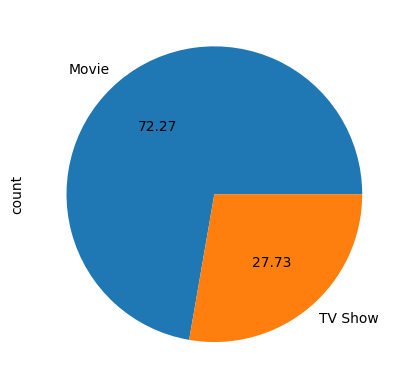

In [28]:
nf_du['type'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='release_year', ylabel='Count'>

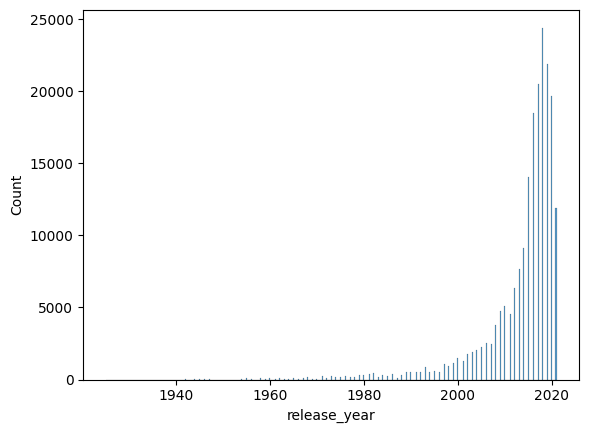

In [33]:
sns.histplot(data=nf_du,x='release_year')

Text(0.5, 1.0, 'Frequency of movies released per year')

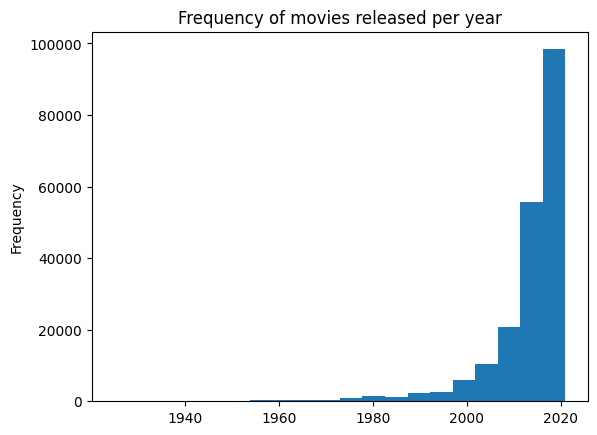

In [317]:
nf_du['release_year'].plot(kind='hist',bins=20)
plt.title("Frequency of movies released per year")

Text(0.5, 1.0, 'Rating vs Type of Content')

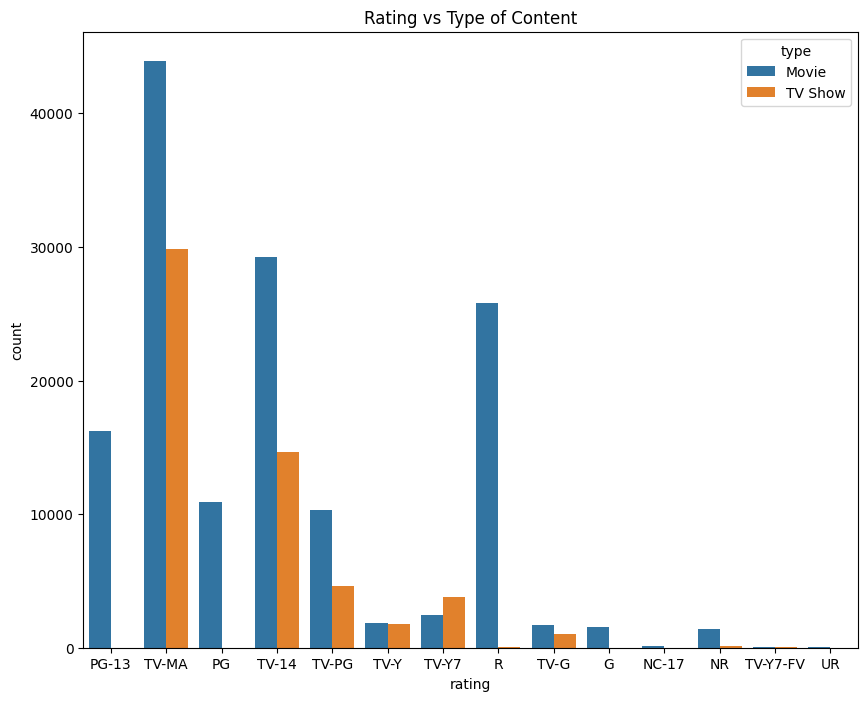

In [318]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating', hue='type', data=nf_du)
plt.title("Rating vs Type of Content")

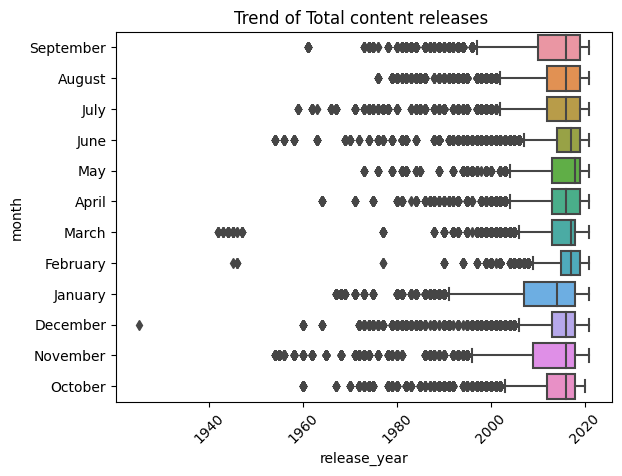

In [191]:
sns.boxplot(data=nf_du,y='month',x='release_year')
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=10)
plt.title("Trend of Total content releases ")
plt.show()


Text(0.5, 1.0, 'Monthly trend of Movies vs TVShow')

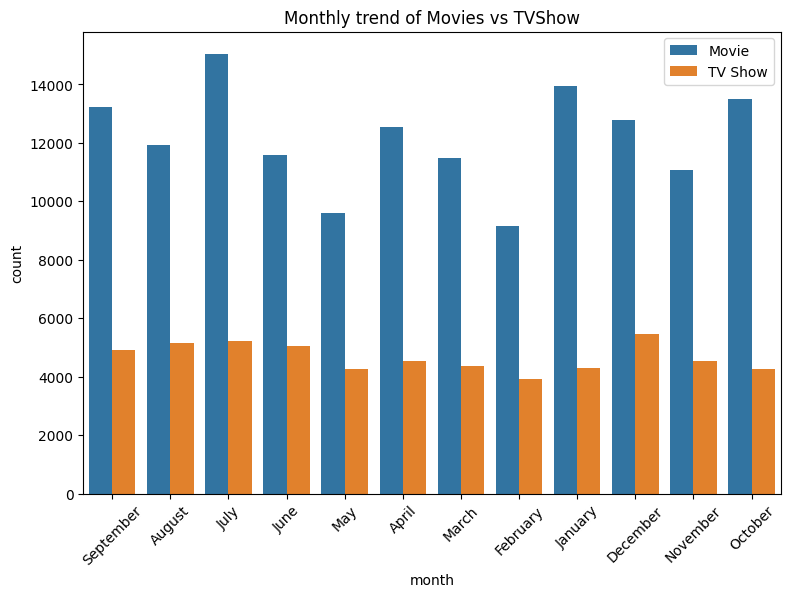

In [342]:
# m=nf_du.groupby(['month','type']).nunique().set_index('month')
plt.figure(figsize=(9,6))
sns.countplot(data=nf_du, x='month',hue='type')
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=10)
plt.legend(loc='upper right')
plt.title("Monthly trend of Movies vs TVShow")

In [125]:
last10years= nf_du[["type", "release_year"]]
last10years = last10years.loc[last10years["release_year"]>=2011]
(last10years.shape[0]/nf_du.shape[0])*100

78.61859718008209

[Text(0.5, 1.0, 'Activity of type of content released in the last 10 years')]

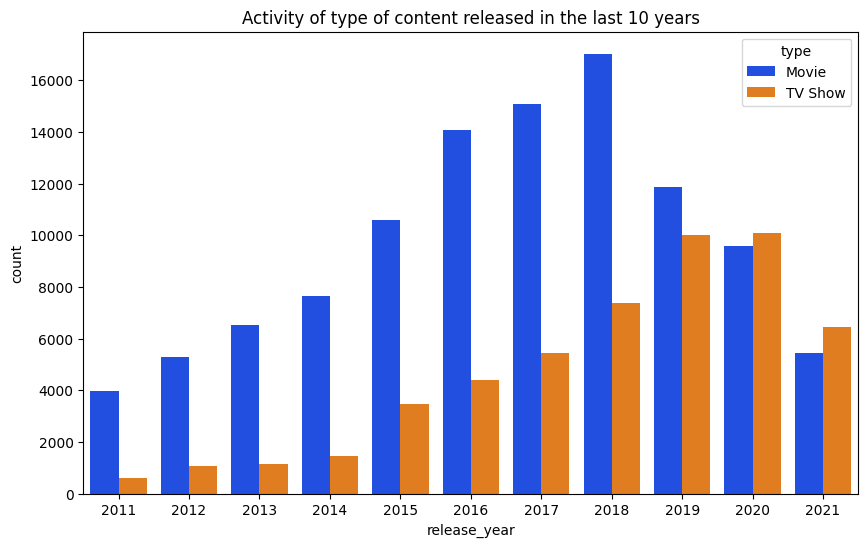

In [344]:
last10years_df = last10years.groupby("release_year")["type"].size().reset_index()
last10years_df = pd.DataFrame(last10years_df)
last10years_df

plt.figure(figsize = (10,6))
count_plot = sns.countplot(x = "release_year", data = last10years, hue="type",
             palette= "bright")
count_plot.set(title = "Activity of type of content released in the last 10 years")


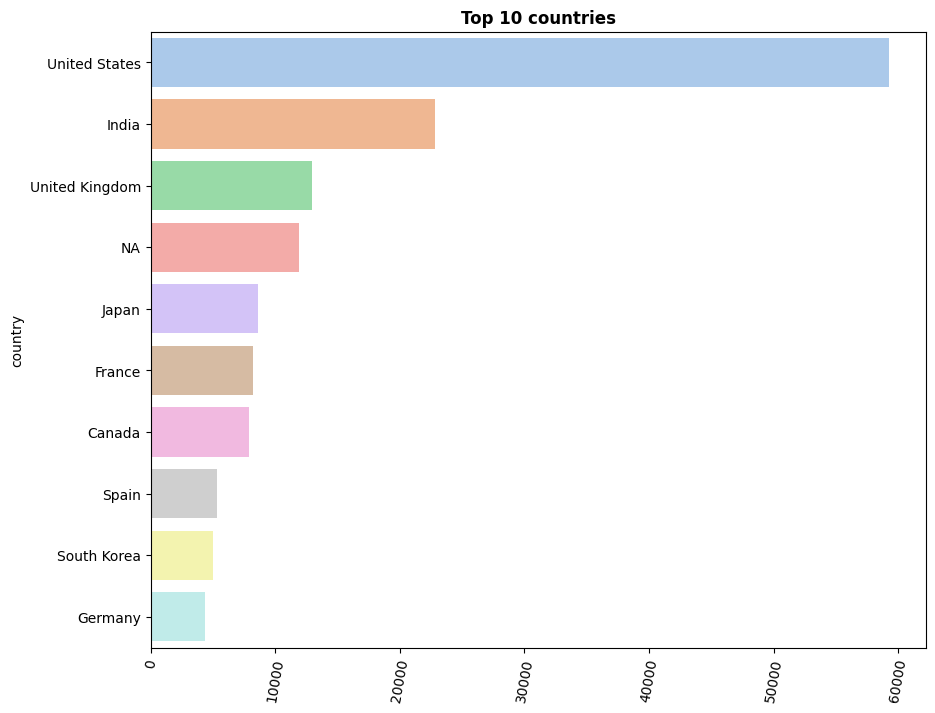

In [348]:
plt.figure(figsize = (10,8))
country_plot = sns.barplot(x = nf_du.country.value_counts()[:10].values, 
                           y= nf_du.country.value_counts()[:10].index,palette = "pastel")
plt.xticks(rotation=80)
plt.title("Top 10 countries",fontweight="bold")
plt.show()

(42,)

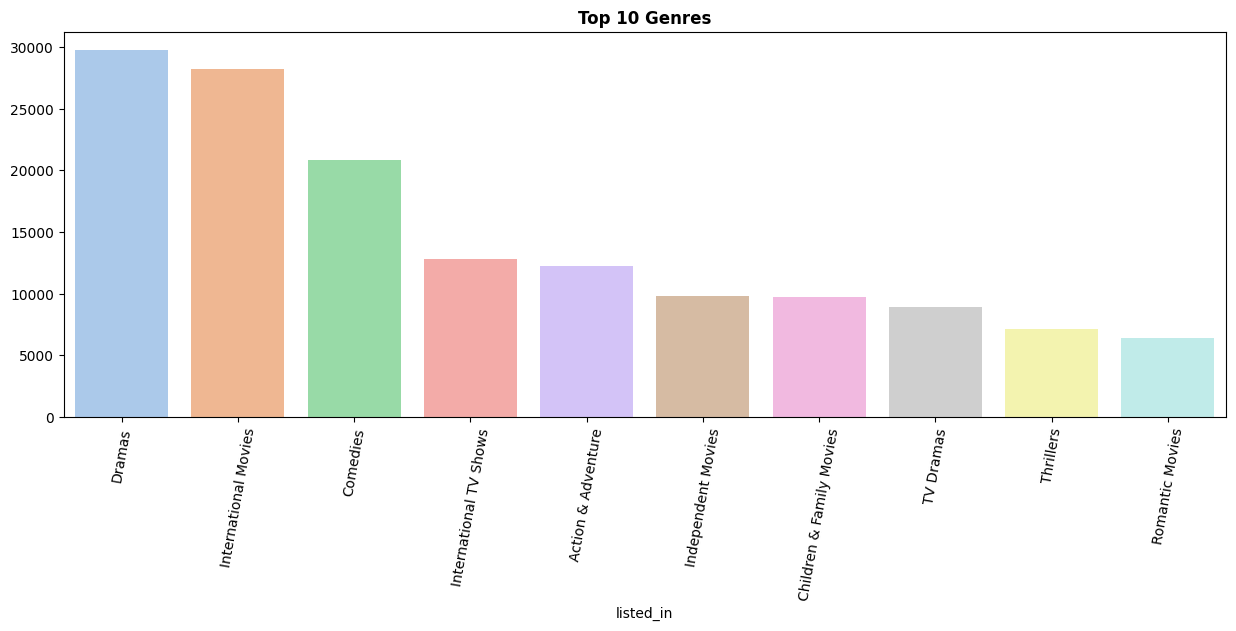

In [346]:
plt.figure(figsize=(15,5))
sns.barplot(x = nf_du["listed_in"].value_counts().head(10).index,
            y = nf_du["listed_in"].value_counts().head(10).values,palette="pastel")
plt.xticks(rotation=80)
plt.title("Top 10 Genres",fontweight="bold")
plt.show()